# Data Analysis Project for Covid19 Data

Import libraries such as numpy, pandas....

In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sbn

Read the covid19data in json format.

In [2]:
data = pd.read_json('Downloads/covid19data_2.json')
data.columns

Index(['_id', 'iso_code', 'continent', 'location', 'date', 'total_cases',
       'new_cases', 'total_cases_per_million', 'new_cases_per_million',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'cardiovasc_death_rate', 'diabetes_prevalence',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'new_cases_smoothed',
       'new_deaths_smoothed', 'new_cases_smoothed_per_million',
       'new_deaths_smoothed_per_million', 'total_deaths', 'new_deaths',
       'total_deaths_per_million', 'new_deaths_per_million',
       'reproduction_rate'],
      dtype='object')

In [3]:
# A quick show of our dataset.
data.head()

,_id,iso_code,continent,location,date,total_cases,new_cases,total_cases_per_million,new_cases_per_million,stringency_index,...,human_development_index,new_cases_smoothed,new_deaths_smoothed,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,total_deaths,new_deaths,total_deaths_per_million,new_deaths_per_million,reproduction_rate
0,{'$oid': '614a75a91742084cfdab48a2'},AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,0.026,0.026,8.33,...,0.511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,{'$oid': '614a75a91742084cfdab48a3'},AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,0.026,0.000,8.33,...,0.511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,{'$oid': '614a75a91742084cfdab48a4'},AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,0.026,0.000,8.33,...,0.511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,{'$oid': '614a75a91742084cfdab48a5'},AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,0.026,0.000,8.33,...,0.511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,{'$oid': '614a75a91742084cfdab48a6'},AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,0.026,0.000,8.33,...,0.511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

To better understand our datasets, we started to explore the attributes in the dataset. In this stage, we will start with data cleaning for any duplicate, nan value and missing data records in the dataset.

In [4]:
data['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [5]:
df = data[data['continent'].isna() == False]
df['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [6]:
df['location'].unique()
# we have data from 221 countries from all over the world

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faeroe Isl

We only want to keep some of the columns that we are interested in.

In [7]:
columns_to_keep = (['_id', 'iso_code', 'continent', 'location', 'date', 'total_cases',
       'new_cases','stringency_index', 'population', 'population_density', 'median_age',
       'aged_70_older', 'gdp_per_capita',
       'handwashing_facilities', 'hospital_beds_per_thousand', 'total_deaths', 'new_deaths'])
df = df[columns_to_keep]
df.head()

,_id,iso_code,continent,location,date,total_cases,new_cases,stringency_index,population,population_density,median_age,aged_70_older,gdp_per_capita,handwashing_facilities,hospital_beds_per_thousand,total_deaths,new_deaths
0,{'$oid': '614a75a91742084cfdab48a2'},AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,8.33,38928341.0,54.422,18.6,1.337,1803.987,37.746,0.5,NaN,NaN
1,{'$oid': '614a75a91742084cfdab48a3'},AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,8.33,38928341.0,54.422,18.6,1.337,1803.987,37.746,0.5,NaN,NaN
2,{'$oid': '614a75a91742084cfdab48a4'},AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,8.33,38928341.0,54.422,18.6,1.337,1803.987,37.746,0.5,NaN,NaN
3,{'$oid': '614a75a91742084cfdab48a5'},AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,8.33,38928341.0,54.422,18.6,1.337,1803.987,37.746,0.5,NaN,NaN
4,{'$oid': '614a75a91742084cfdab48a6'},AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,8.33,38928341.0,54.422,18.6,1.337,1803.987,37.746,0.5,NaN,NaN


For nan values in 'total_deaths' and 'new_deaths', I decided to put a 0 to indicate no death information for that particular date and location.

In [8]:
df['total_deaths'] = df['total_deaths'].fillna(0)
df['new_deaths'] = df['new_deaths'].fillna(0)
df.head()

,_id,iso_code,continent,location,date,total_cases,new_cases,stringency_index,population,population_density,median_age,aged_70_older,gdp_per_capita,handwashing_facilities,hospital_beds_per_thousand,total_deaths,new_deaths
0,{'$oid': '614a75a91742084cfdab48a2'},AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,8.33,38928341.0,54.422,18.6,1.337,1803.987,37.746,0.5,0.0,0.0
1,{'$oid': '614a75a91742084cfdab48a3'},AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,8.33,38928341.0,54.422,18.6,1.337,1803.987,37.746,0.5,0.0,0.0
2,{'$oid': '614a75a91742084cfdab48a4'},AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,8.33,38928341.0,54.422,18.6,1.337,1803.987,37.746,0.5,0.0,0.0
3,{'$oid': '614a75a91742084cfdab48a5'},AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,8.33,38928341.0,54.422,18.6,1.337,1803.987,37.746,0.5,0.0,0.0
4,{'$oid': '614a75a91742084cfdab48a6'},AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,8.33,38928341.0,54.422,18.6,1.337,1803.987,37.746,0.5,0.0,0.0


We can plot some graph to observe the relationship among the attributes.

<AxesSubplot:xlabel='date', ylabel='new_cases'>

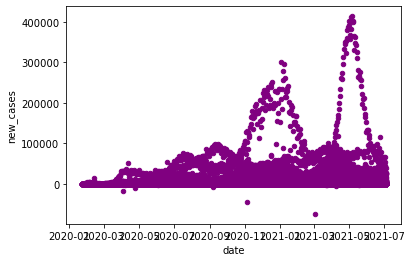

In [9]:
# scatter plot of new_cases against date
df.plot.scatter('date','new_cases',c = 'purple')

We can observe some pattern in the scatter plot, thus we might consider doing a time series analysis later on.

In [10]:
# Find if there is any correlation in our datasets (numeric columns)
covid_corr = df.corr('pearson')
covid_corr

,total_cases,new_cases,stringency_index,population,population_density,median_age,aged_70_older,gdp_per_capita,handwashing_facilities,hospital_beds_per_thousand,total_deaths,new_deaths
total_cases,1.000000,0.662632,0.070918,0.330189,-0.023239,0.106811,0.102814,0.094963,0.060437,0.000148,0.928438,0.662905
new_cases,0.662632,1.000000,0.098476,0.343709,-0.020209,0.089977,0.083307,0.068812,0.044180,-0.005818,0.600879,0.811170
stringency_index,0.070918,0.098476,1.000000,0.083391,-0.022794,0.064968,0.002149,0.017132,0.305868,-0.029312,0.088179,0.131354
population,0.330189,0.343709,0.083391,1.000000,-0.024554,0.033512,-0.016765,-0.053013,0.040232,-0.036530,0.281587,0.300960
population_density,-0.023239,-0.020209,-0.022794,-0.024554,1.000000,0.155894,0.051417,0.341347,0.097609,0.310587,-0.033773,-0.030615
median_age,0.106811,0.089977,0.064968,0.033512,0.155894,1.000000,0.899724,0.643999,0.786674,0.662106,0.128130,0.108049
aged_70_older,0.102814,0.083307,0.002149,-0.016765,0.051417,0.899724,1.000000,0.489823,0.637809,0.652439,0.128576,0.101368
gdp_per_capita,0.094963,0.068812,0.017132,-0.053013,0.341347,0.643999,0.489823,1.000000,0.651797,0.295955,0.094184,0.062780
handwashing_facilities,0.060437,0.044180,0.305868,0.040232,0.097609,0.786674,0.637809,0.651797,1.000000,0.448244,0.115244,0.083117
hospital_beds_per_thousand,0.000148,-0.005818,-0.029312,-0.036530,0.310587,0.662106,0.652439,0.295955,0.448244,1.000000,-0.005339,-0.003326


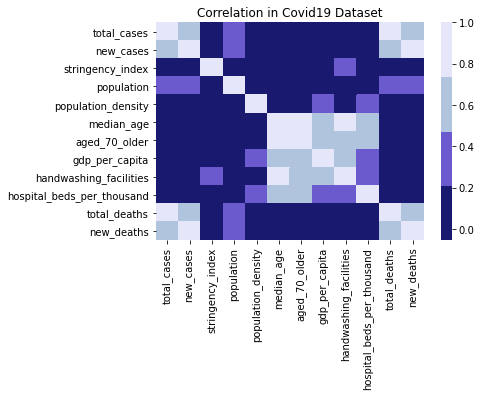

In [11]:
#visualize the correlation in heatmap
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
cmap = colors.ListedColormap(['midnightblue','slateblue','lightsteelblue','lavender'])
sbn.heatmap(covid_corr,cmap = cmap)
plt.title('Correlation in Covid19 Dataset')
plt.show()

We focus on the columns which contribute correlation above 0.5 with each others
The columns would be:
1. total_cases vs new_cases
2. total_cases vs total_deaths
3. total_cases vs new_deaths
4. new_cases vs total_deaths
5. median_age vs aged_70_older
6. median_age vs gdp_per_capita
7. median_age vs handwashing_facilities
8. median_age vs hospital_beds_per_thousand
9. aged_70_older vs gdp_per_capita
10. aged_70_older vs handwashing_facilities
11. aged_70_older vs hospital_beds_per_thousand
12. gdp_per_capita vs hospital_beds_per_thousand
13. total_deaths vs new_deaths

In summary, 
(1) number of deaths are highly correlated with number of cases
(2) age, gdp and facilities are correlated within each others

Text(0.5, 1.0, 'Strictness in Covid-19 policy vs Number of New Cases')

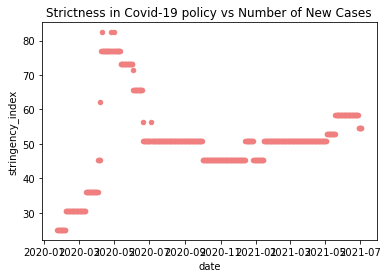

In [16]:
# scatter plot of date and stringency_index
# We would narrow down to see 'location' = 'Singapre'
df_sg = df[df['location'] == 'Singapore']
df_sg.plot.scatter('date','stringency_index',color = 'lightcoral')
plt.title('Strictness in Covid-19 policy vs Number of New Cases')